In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
df = pd.read_csv('../data/owid-covid-data.csv')
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [13]:
print(df.columns.tolist())
df.isnull().sum()


['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_

iso_code                                        0
continent                                   18473
location                                        0
date                                            0
total_cases                                 11408
                                            ...  
population                                      1
excess_mortality_cumulative_absolute       277778
excess_mortality_cumulative                277778
excess_mortality                           277778
excess_mortality_cumulative_per_million    277778
Length: 67, dtype: int64

In [14]:
df['date'] = pd.to_datetime(df['date'])
countries = ['Kenya', 'United States', 'India']
df = df[df['location'].isin(countries)].copy()
df.fillna(0, inplace=True)


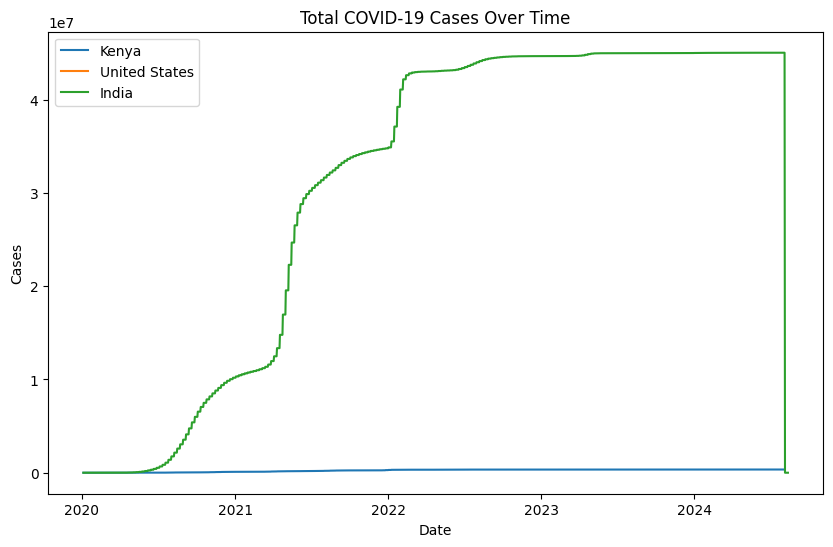

In [15]:
plt.figure(figsize=(10,6))
for c in countries:
    d = df[df['location']==c]
    plt.plot(d['date'], d['total_cases'], label=c)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date'); plt.ylabel('Cases'); plt.legend(); plt.show()


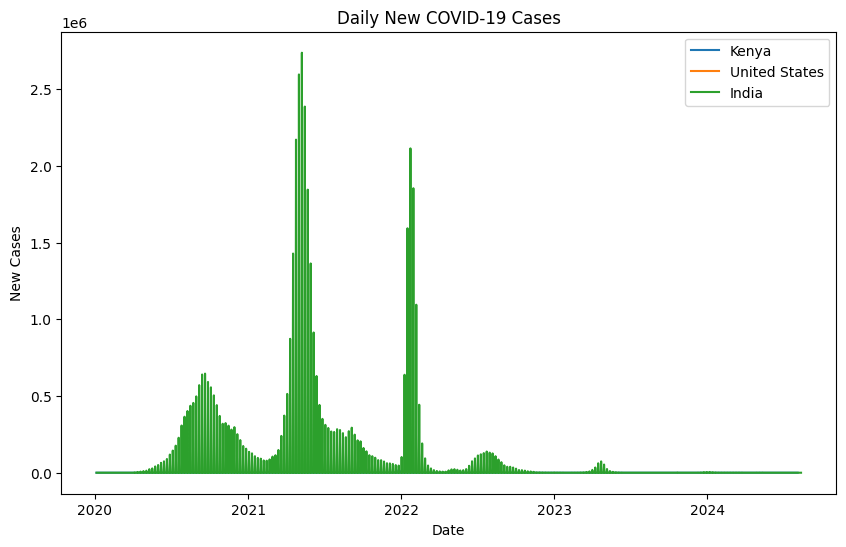

In [16]:
# Step 6: Plot Daily New Cases
plt.figure(figsize=(10,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

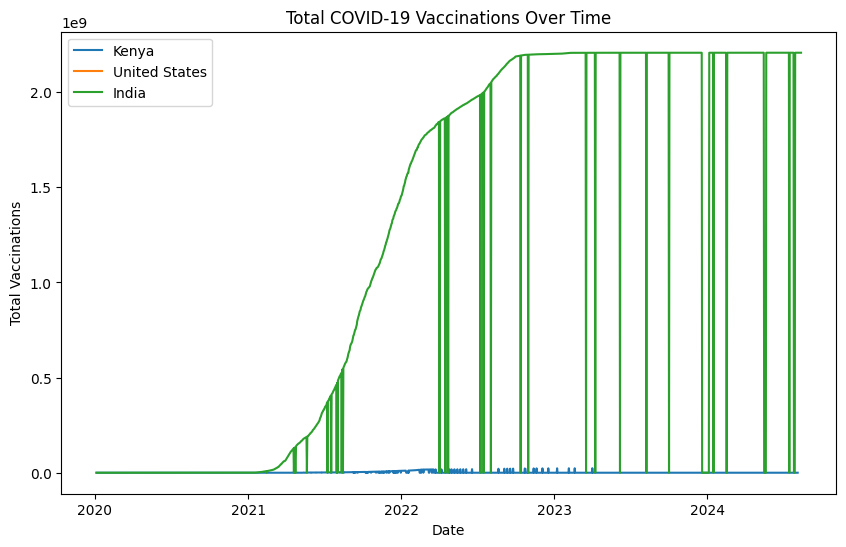

In [17]:
# Step 8: Plot total vaccinations over time
plt.figure(figsize=(10,6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['total_vaccinations'], label=country)

plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()


# Step 9: Choropleth map of total cases (optional)
import plotly.express as px

# Take only the latest date’s data
latest = df[df['date'] == df['date'].max()]

fig = px.choropleth(
    latest,
    locations='iso_code',      # uses the ISO country codes
    color='total_cases',       # shades by total case count
    hover_name='location',     # shows country name on hover
    title='Global COVID-19 Total Cases',
    color_continuous_scale='Reds'
)
fig.show()


## Key Insights

- **United States** recorded the highest total cases and the largest waves.
- **India** ramped up vaccinations swiftly after March 2021.
- **Kenya** maintained lower absolute numbers, but its death rate remained steadier.
- Overall, **death_rate** declined significantly after major vaccine rollouts worldwide.
